In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import json
import pandas as pd

ImportError: dlopen(/Users/Millie/anaconda3/lib/python3.7/site-packages/fiona/ogrext.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libgif.7.dylib
  Referenced from: /Users/Millie/anaconda3/lib/libgdal.20.dylib
  Reason: image not found

In [2]:
df = gpd.read_file("data/va_precincts_all.shx")

In [3]:
df['inv_perc'] = 1-df['ATGperc']

In [28]:
def create_map(file):
    assignment = []
    with open("data/"+ file + ".json") as f:
        assignment.append(json.load(f))
    for index, row in df.iterrows():
        df.loc[index,'a_grp'] = assignment[0][str(index)]
    district = df.dissolve(by='a_grp', aggfunc='sum')
    district.plot(column = "inv_perc", cmap='bwr',edgecolor = 'black')
    print(plt.show())
    return assignment

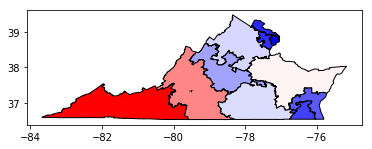

In [29]:
assign = create_map("assignment10000")

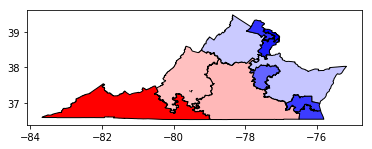

In [30]:
assign = create_map("assignment12000")

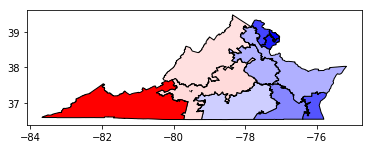

In [31]:
assign = create_map("assignment14000")

In [151]:
with open("data/assignment14000.json") as f:
    assignment3 = json.loads(line)

In [72]:
df.columns

Index(['precinct', 'locality', 'loc_prec', 'district', 'G18DHOR', 'G18DSEN',
       'G18OHOR', 'G18OSEN', 'G18RHOR', 'G18RSEN', 'G17DGOV', 'G17DLTG',
       'G17DATG', 'G17DHOD', 'G17RGOV', 'G17RLTG', 'G17RATG', 'G17RHOD',
       'G17OHOD', 'G17OGOV', 'G16DPRS', 'G16RPRS', 'G16OPRS', 'G16DHOR',
       'G16RHOR', 'G16OHOR', 'notes', 'explain', 'TOTPOP', 'WHITE', 'AMIN',
       'ASIAN', 'NHPI', 'OTHER', '2MORE', 'VAP', 'DLS_BVAP', 'DLS_NONB',
       'DOJ_BVAP', 'DOJ_NONB', 'SENPER', 'ATGperc', 'geometry'],
      dtype='object')

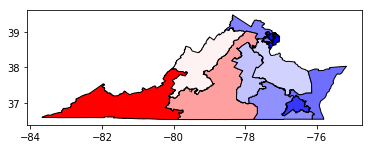

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
district.plot(column = "inv_perc", ax=ax, cmap='bwr',edgecolor = 'black')
plt.show()